# 使用蒙地卡羅方法估算圓周率值

In [1]:
# 匯入numpy套件，用於數值計算與陣列處理
import numpy as np

# 匯入math模組，用於數學運算
import math

# 匯入random模組，用於隨機數生成
import random

# 匯入matplotlib.pyplot，用於資料視覺化繪圖
import matplotlib.pyplot as plt

In [2]:
# 設定正方形邊長為1
square_size = 1

# 初始化圓內點數與正方形內點數為0
points_inside_circle = 0
points_inside_square = 0

# 定義樣本數為100000，也就是要生成的隨機點數量
sample_size = 100000

# 定義圓弧範圍(四分之一圓)，用於繪製(範圍從0到π/2之間均勻分布的100個點)
arc = np.linspace(0, np.pi / 2, 100)

In [3]:
# 定義函式：在正方形內隨機生成一個點
def generate_points(size):
    x = np.random.random() * size  # 隨機生成x座標(0到size之間)
    y = np.random.random() * size  # 隨機生成y座標(0到size之間)
    return(x, y)                   # 回傳x、y的值

# 定義函式：判斷點是否在圓內(距離圓心小於等於半徑)
def is_in_circle(point, size):
    return math.sqrt(point[0] ** 2 + point[1] ** 2) <= size

# 定義函式：根據蒙地卡羅方法計算pi的近似值
def compute_pi(points_inside_circle, points_inside_square):
    return 4 * (points_inside_circle / points_inside_square)

In [4]:
# 根據設定的樣本數生成點並估算pi值
sample_size = 1000000  # 更新樣本數至100萬，提升準確度
for i in range(sample_size):
    # 產生隨機點
    point = generate_points(square_size)

    # 計數正方形內的點數
    points_inside_square += 1

    # 若點在圓內，計數圓內點數
    if is_in_circle(point, square_size):
        points_inside_circle += 1

# 印出蒙地卡羅估算出的圓周率近似值(以format格式表示)
print("Approximate value of pi is {}".format(compute_pi(points_inside_circle, points_inside_square)))

Approximate value of pi is 3.143044


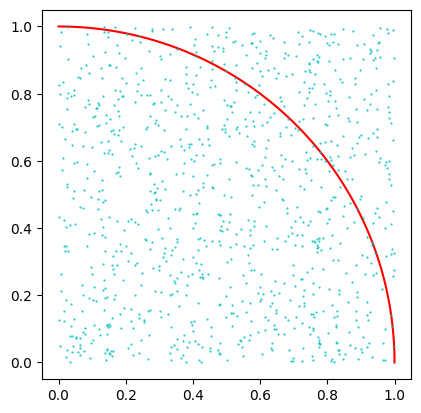

In [5]:
# 設定繪圖比例一致，確保圓看起來是圓形(長寬比例相同)
plt.axes().set_aspect('equal')

# 繪製四分之一圓弧線，顏色設為紅色
plt.plot(np.cos(arc), np.sin(arc), 'r-')

# 初始化計數器，用來計算圓內和正方形內的點數
points_inside_circle = 0
points_inside_square = 0

# 產生1000個隨機點並繪製，避免點數過多導致繪圖卡頓
for i in range(1000):
    # 生成正方形內的隨機點
    point = generate_points(square_size)

    # 在圖上以青色小點標示該點
    plt.plot(point[0], point[1], 'c.', markersize = 1)

    # 正方形內點數累加
    points_inside_square += 1

    # 若點位於圓內，圓內點數累加
    if is_in_circle(point, square_size):
        points_inside_circle += 1                   

# 顯示繪製結果
plt.show()